In [6]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.shape

(13320, 9)

In [10]:
#dropping the columns that are not important
df2=df.drop(["area_type","society","availability","balcony"],axis="columns")

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
#note for handling the missing values we are just dropping the rows because the number of missing rows are very less as
#compared to the dataset
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3["BHK"]=df3["size"].apply(lambda x:int(x.split(" ")[0]))

<ipython-input-15-a5897ab57400>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"]=df3["size"].apply(lambda x:int(x.split(" ")[0]))


In [16]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def isfloat(x):
    
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3["total_sqft"].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    
    if len(tokens)==2:
        return float((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [22]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_num)

In [23]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df5=df4.copy()

df5["price_per_sqaure_feet"]=df5["price"]*100000/df5["total_sqft"]

df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqaure_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df5.location.unique())

1304

In [26]:
# as this has so much of unique texts it becomes hard for us one hot encode
#IT INTO DUMMY VALUES
#this is called as dimentionality curse
#ine beautiful dimentionality reduction technique available is called as to come up with other category

df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
a=location_stats[location_stats<=10]

In [28]:
df5.location=df5.location.apply(lambda x:"other" if x in a else x)

In [29]:
len(df5.location.unique())

242

In [30]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqaure_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Removing Outliers

In [31]:
#let say my expert says that typical size of one bedroomed home is 300
#now to detect the outliers get the values less than 300

df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqaure_feet
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [33]:
df6.head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqaure_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [34]:
df6.price_per_sqaure_feet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqaure_feet, dtype: float64

In [35]:
#now to build a generic model we assume that our dataset to be normal distribution
#so we use mean and standard deviation to remove the extremes
#in this case we are going to remove anything 1 deviation(68%)

#so we use mean and std deviation for each location as this makes more sense here

def remove_pps_outliers(df):
    
    df_out=pd.DataFrame()
    
    for key,subdf in df.groupby("location"):
        
        m=np.mean(subdf.price_per_sqaure_feet)
        st=np.std(subdf.price_per_sqaure_feet)
        
        reduced_df=subdf[(subdf.price_per_sqaure_feet>(m-st)) & (subdf.price_per_sqaure_feet<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out

df7=remove_pps_outliers(df6)

In [36]:
df7.shape

(10241, 7)

In [37]:
#removing the outliers which have lower 3 bedroom price while compared to that of lower bedroom houses for the same
#square feet

def remove_bhk_outliers(df):
    
    exclude_indices=np.array([])
    
    for location,location_df in df.groupby("location"):
        
        bhk_stats={}
        
        for bhk,bhk_df in location_df.groupby("BHK"):
            
            #print(bhk_df.columns)
            
            bhk_stats[bhk]={
                
                    "mean": np.mean(bhk_df['price_per_sqaure_feet']),
                    "std" : np.std(bhk_df['price_per_sqaure_feet']),
                    "count":bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby("BHK"):
            
            stats=bhk_stats.get(bhk-1)
            
            if stats and stats["count"]>5:
                
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price_per_sqaure_feet']<stats["mean"]].index.values)
                
    return df.drop(exclude_indices,axis="index")

df8=remove_bhk_outliers(df7)

In [38]:
df8.shape

(7329, 7)

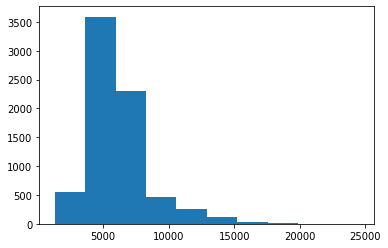

In [39]:
plt.hist(df8['price_per_sqaure_feet'])
plt.show()

In [40]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [41]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqaure_feet
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


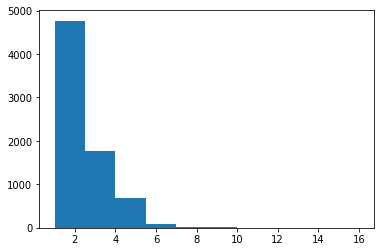

In [42]:
plt.hist(df8.bath)
plt.show()

In [43]:
df9=df8[df8.bath<df8["BHK"]+2]

In [44]:
df9.shape

(7251, 7)

In [45]:
df10=df9.drop(["size",'price_per_sqaure_feet'],axis="columns")

In [47]:
df10.shape

(7251, 5)

# BUILDING MACHINE LEARNING MODEL

In [48]:
#first have to convert location from text to numbers
#by using one hot encoding(dummies)

dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11=pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")

In [50]:
df12=df11.drop("location",axis="columns")

In [51]:
df12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7251, 245)

In [46]:
X=df12.drop("price",axis="columns")
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697873348

In [50]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [56]:
# How about looking after some other regression models like lasso regression model,DT regression,etc
# to come up with the best model we use a technique called grid search cv method
#as a data science guy i need to look after the models which works great

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model(X,y):
    
    algos={
        
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True,False]
            }
            
        },
        
        "lasso":{
            
            "model":Lasso(),
            "params":{
                
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        
        "decision_tree":{
            
            "model":DecisionTreeRegressor(),
            "params":{
                
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    
    for algo_name,config in algos.items():
        
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
        
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

In [57]:
grid=find_best_model(X,y)

In [58]:
grid

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687483,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.712156,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [59]:
#this shows that linear_regression classifier is the best for the proposed models